In [1]:
%aimport foldwiseprocessor
from foldwiseprocessor import FoldWiseProcessor
import foldwiseprocessor

from fmrisamplecleaningtransform import get_affected_samples
from fmricleaner import remove_samples
import os
import numpy as np
import mvpa2
import nibabel
import pickle
import gzip
from mvpa2.suite import *
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import targetdatautility
%matplotlib inline

ERROR: Line magic function `%aimport` not found.
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:1502: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, varkw, defaults = inspect.getargspec(jac.__init__)
E:\Anaconda3\lib\site-packages\scipy\stats\

 * Please note: warnings are printed only once, but underlying problem might occur many times *


E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:
E:\Anaconda3\lib\site-packages\scipy\_lib\decorator.py:205: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  first = inspect.getargspec(caller)[0][0]  # first arg
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\mvpa2\datasets\sources\skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)
E:\Anaconda3\lib\site-packages\mvpa2\base\dochelpers.py:167: FutureWarning: split() requires a non-empty pattern match.
  entries = __re_spliter1.split(paramdoc)
E:\Anaconda3\lib\site-packages\pandas\__init__.py:7: Depre

In [2]:
# get the location of the files
trajectory_path = "..\\..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win10.pkl"
subject_timeline_path = "..\\..\\data\\plosone\\subject_3.mat"
bold_fname = os.path.join('..', '..', 'data', 'qub', '4Dw.nii')
mask_fname = os.path.join('..', '..', 'data', 'qub', 'struct', 'final_mask_w.hdr')
ds_removal_transform = get_affected_samples(trajectory_path, subject_timeline_path)
ds = remove_samples(bold_fname, mask_fname, ds_removal_transform)
print(len(ds))
#get the trajectory
with open('..\\..\\data\\story\\smoothedTrajectoriesDifferentWindowSizes\\smoothTrajRawValenceMean_win10.pkl', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    original_trajectory = u.load()
#downsample the trajectory to fit match the number of fMRI sample
resampled_trajectory = resample(original_trajectory, len(ds.samples))
resampled_trajectory = targetdatautility.convert_targets_to_simple_values(resampled_trajectory)
ds.sa['targets'] = resampled_trajectory

1295


In [ ]:
old_ds = ds
ds = old_ds[:400]

In [3]:
fold_wise_processor = FoldWiseProcessor(ds, resampled_trajectory, kNN(k=5, dfx=one_minus_correlation, voting='majority'), 10, True)

In [4]:
import importlib
import foldwiseprocessor

importlib.reload(foldwiseprocessor)

from foldwiseprocessor import FoldWiseProcessor

results = fold_wise_processor.process()

starting to process
starting turn :/ 0
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 1
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 2
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 3
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 4
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 5
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 6
results contains 0 entries
<SampleAttributesCollection: fold_num,important,targets,time_coords,time_indices>
starting turn :/ 7
results contains 0 entries
<SampleAttributesCollection: fold_num,

In [10]:
print(fold_wise_processor.results)

[1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -

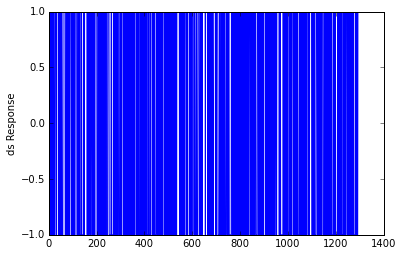

In [6]:
plt.plot(ds.sa.targets)
plt.ylabel('ds Response')
plt.show()

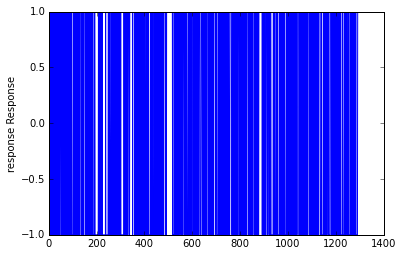

In [7]:
plt.plot(fold_wise_processor.results)
plt.ylabel('response Response')
plt.show()

In [8]:
np.corrcoef(fold_wise_processor.results, ds.sa.targets)[0, 1]

-0.031689275804164738

In [9]:
np.mean(fold_wise_processor.results == ds.sa.targets)

0.48416988416988416

In [ ]:
array = np.array([1, 2, 3, 4, 9, 10])

In [ ]:
np.split(array, 2)

In [ ]:
def split_list(source_list, wanted_parts=1):
    
    association_transfrom = []
    
    for i in range(0, len(source_list)):
        association_transfrom.append(i)
        
    #print(association_transfrom)
    
    length = len(association_transfrom)
    ## // notates integer division
    result_transform = [ association_transfrom[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]
    
    count = 0
    
    result = []
    
    for i in range(0, len(result_transform)):
        print(result_transform[i])
        
        for value in result_transform[i]:
            result.append(i)
            #print(value)
            #source_list[value]
            
    return result

In [ ]:
split_list([1, 2, 3, 4, 9, 10, 6], 3)

In [ ]:
len(foldwiseprocessor.generate_chunk_transform_for_ds(ds, 7))

In [ ]:
len(ds)